In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB
None
Transaction_ID             0
Timestamp                  0
Vehicle_Type 

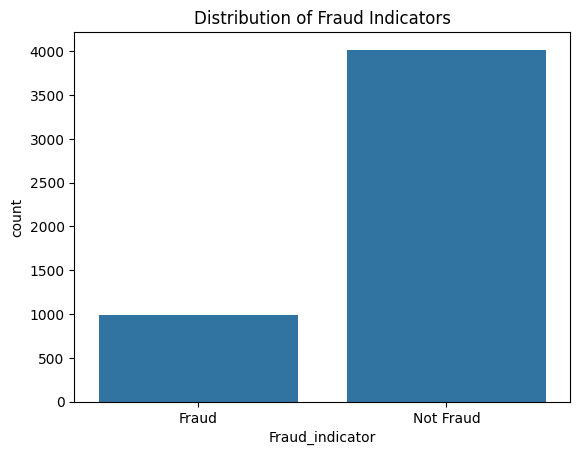

<ipython-input-11-ce353ac129fd>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded.fillna(0, inplace=True)
<ipython-input-11-ce353ac129fd>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded.fillna(0, inplace=True)


              precision    recall  f1-score   support

       Fraud       1.00      0.72      0.84       217
   Not Fraud       0.93      1.00      0.96       783

    accuracy                           0.94      1000
   macro avg       0.96      0.86      0.90      1000
weighted avg       0.94      0.94      0.94      1000

[[157  60]
 [  0 783]]


In [ ]:
# Step 1: Data Exploration

# Load the dataset
data = pd.read_csv('/FastagFraudDetection (1).csv')

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Distribution of the target variable
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Distribution of Fraud Indicators')
plt.show()

# Step 2: Feature Engineering

# Concatenate training and test sets
combined_data = pd.concat([X_train, X_test])

# Specify categorical columns for one-hot encoding
categorical_cols = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number']

# Split the combined data back into training and test sets
X_train_encoded = combined_data[:len(X_train)]
X_test_encoded = combined_data[len(X_train):]

# Handle remaining missing values, if any
X_train_encoded.fillna(0, inplace=True)
X_test_encoded.fillna(0, inplace=True)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Step 4: Real-time Fraud Detection

# Explore the feasibility of real-time fraud detection using the trained model
# You may need to deploy the model to a real-time environment and set up data pipelines for inference

# Step 5: Explanatory Analysis

# Explore factors contributing to fraudulent transactions
# You can analyze feature importance from the trained model, visualize patterns in fraudulent transactions, etc.
